# Assignment 4 Solution: Image Processing and Computer Vision using OpenCV
**Student**: Ricardo Tássio (suffix 497)


## Part 1: Basics of OpenCV
We will load an image, display it, convert color spaces, print its shape, and save the grayscale version. Variables and functions include the suffix to make them unique.

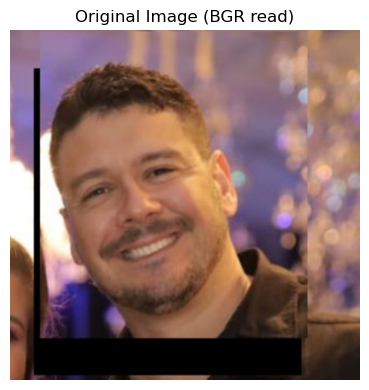

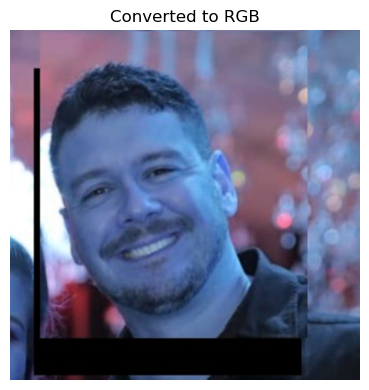

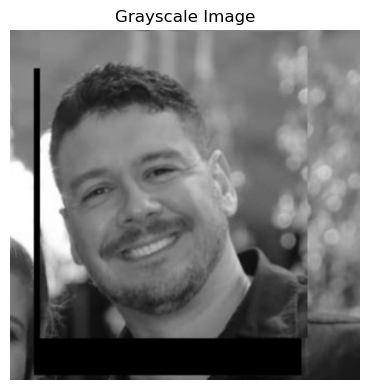

Shape of original image (height, width, channels): (389, 389, 3)
Shape of grayscale image (height, width): (389, 389)
Grayscale image saved as grayscale_497.png


In [5]:
!python -m pip install --upgrade pip
!pip install opencv-python matplotlib numpy nbformat
import cv2
from matplotlib import pyplot as plt
import os

# Student-specific suffix to avoid collision
suffix_497 = "497"

# -- Step 1: Load image --
# Replace 'profile.jpg' with your uploaded image filename in Colab.
img_path_497 = "profile.jpg"
if not os.path.exists(img_path_497):
    print(f"WARNING: {img_path_497} not found. Please upload your profile image to the runtime and name it 'profile.jpg'.")
# Read image using OpenCV (BGR format)
image_bgr_497 = cv2.imread(img_path_497)

# Display original image using matplotlib (convert BGR to RGB for proper colors)
def show_image_497(img, title, cmap=None):
    plt.figure(figsize=(6,4))
    if len(img.shape) == 3:
        # assume BGR -> convert to RGB for display
        img_disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_disp)
    else:
        plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

if image_bgr_497 is not None:
    show_image_497(image_bgr_497, "Original Image (BGR read)")
    # Convert BGR to RGB explicitly
    image_rgb_497 = cv2.cvtColor(image_bgr_497, cv2.COLOR_BGR2RGB)
    show_image_497(image_rgb_497, "Converted to RGB")

    # Convert to grayscale
    image_gray_497 = cv2.cvtColor(image_bgr_497, cv2.COLOR_BGR2GRAY)
    show_image_497(image_gray_497, "Grayscale Image", cmap='gray')
    print("Shape of original image (height, width, channels):", image_bgr_497.shape)
    print("Shape of grayscale image (height, width):", image_gray_497.shape)

    # Save grayscale image
    out_gray_filename_497 = f"grayscale_497.png"
    cv2.imwrite(out_gray_filename_497, image_gray_497)
    print(f"Grayscale image saved as {out_gray_filename_497}")
else:
    print("Image not loaded; cannot proceed with Part 1.")

## Part 2: Image Manipulations
Apply translation, rotation, scaling, smoothing (Gaussian and median), and edge detection. Display original vs transformed images side by side and explain each in comments.

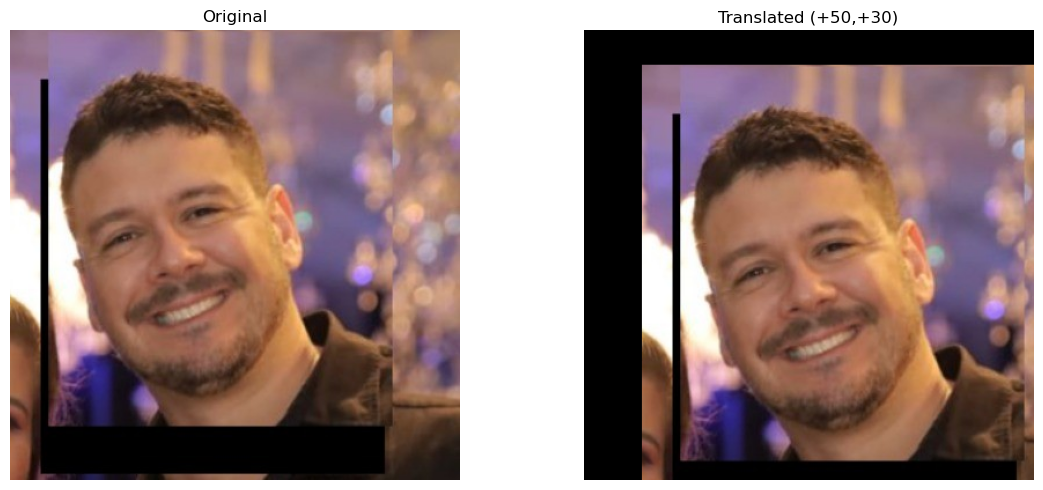

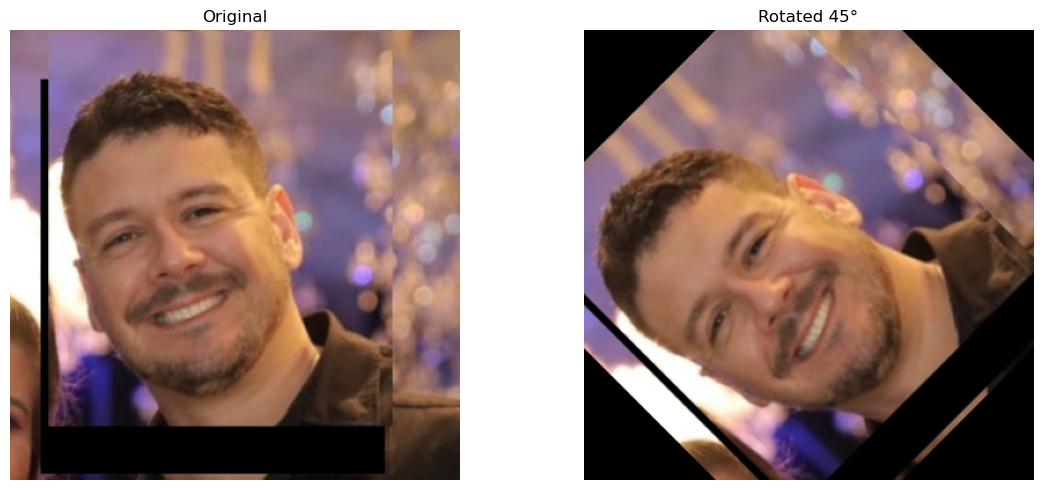

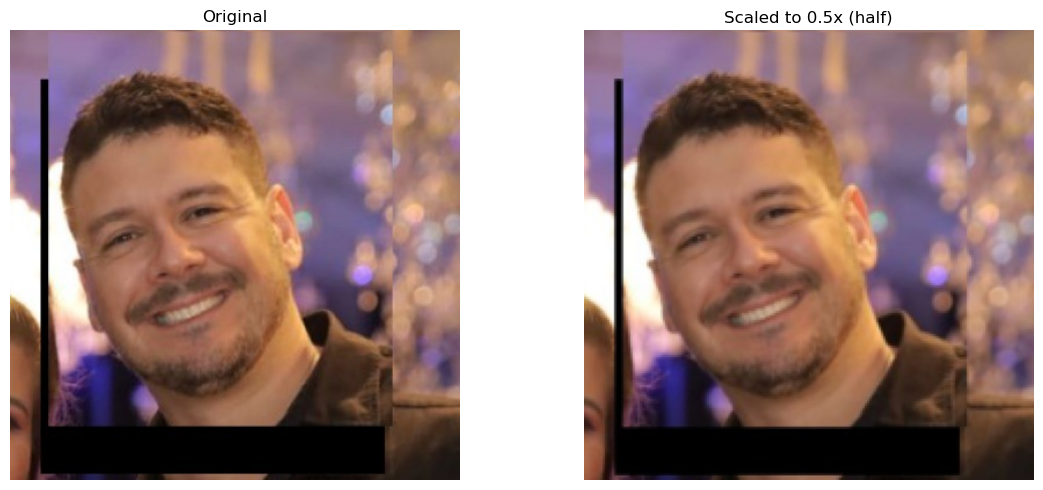

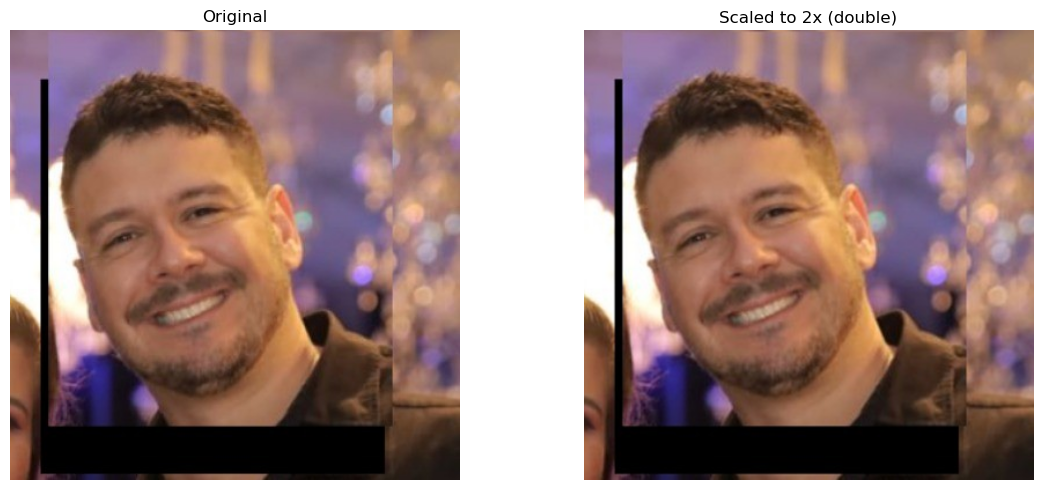

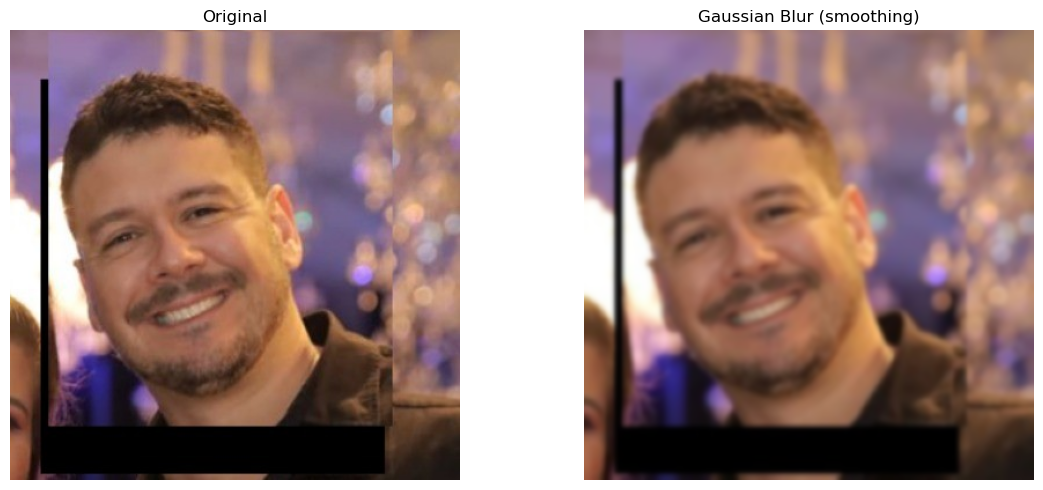

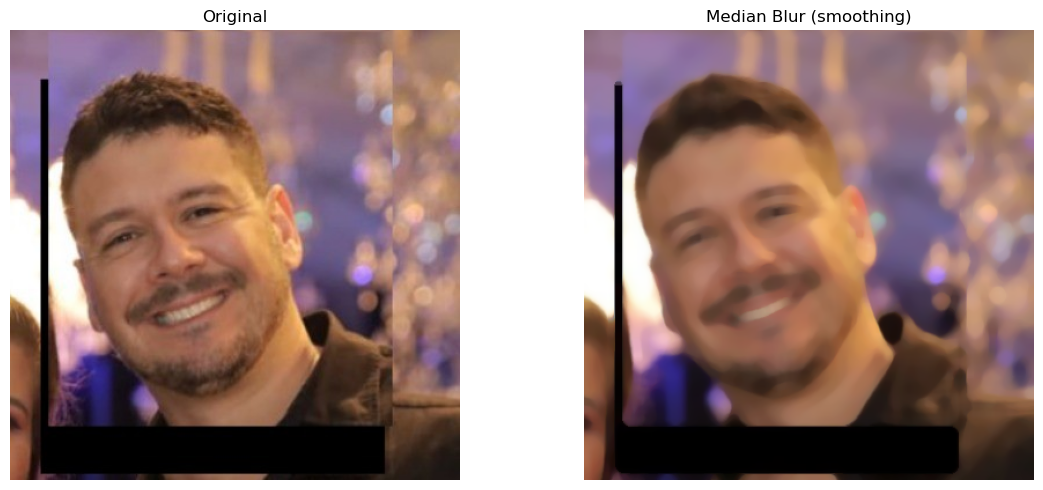

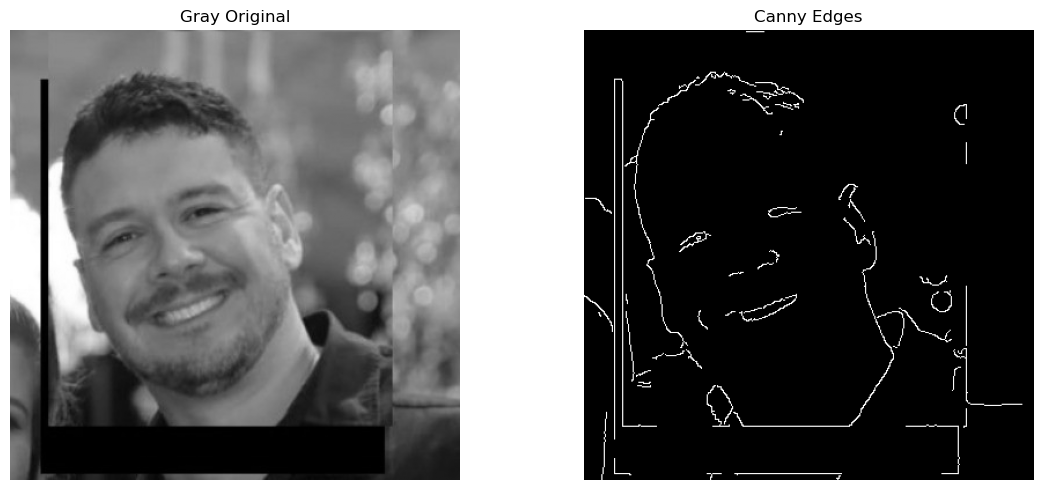

Explanations:
    - Translation shifts the image in x/y without changing content, useful for aligning or simulating camera movement.
    - Rotation changes orientation around a center; here 45° rotates the image, affecting its viewpoint.
    - Scaling resizes; downsampling (half) reduces detail, upsampling (double) may introduce interpolation artifacts.
    - Gaussian blur smooths by averaging neighboring pixels with a Gaussian kernel, reducing high-frequency noise.
    - Median blur replaces each pixel with the median of its neighborhood, preserving edges better while removing salt-and-pepper noise.
    - Canny edge detection finds sharp intensity gradients, highlighting object boundaries.


In [2]:
import numpy as np

# Ensure the grayscale and color images exist from Part 1
if 'image_bgr_497' in globals() and image_bgr_497 is not None:
    orig = image_bgr_497

    # Translation: shift horizontally and vertically
    def translate_497(img, x_shift, y_shift):
        height, width = img.shape[:2]
        M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
        translated = cv2.warpAffine(img, M, (width, height))
        return translated

    trans_img_497 = translate_497(orig, x_shift=50, y_shift=30)  # shift right 50, down 30

    # Rotation: rotate by 45 degrees around center
    def rotate_497(img, angle):
        height, width = img.shape[:2]
        center = (width // 2, height // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(img, M, (width, height))
        return rotated

    rot_img_497 = rotate_497(orig, 45)

    # Scaling: half and double size
    half_497 = cv2.resize(orig, (0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    double_497 = cv2.resize(orig, (0,0), fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)

    # Smoothing: Gaussian blur vs median blur
    gaussian_497 = cv2.GaussianBlur(orig, (11,11), sigmaX=0)
    median_497 = cv2.medianBlur(orig, 11)

    # Edge detection: Canny
    edges_497 = cv2.Canny(cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY), threshold1=100, threshold2=200)

    # Display comparisons side by side function
    def compare_two_497(img1, img2, title1, title2, cmap1=None, cmap2=None):
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        if img1.ndim == 3:
            plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img1, cmap=cmap1)
        plt.title(title1)
        plt.axis('off')

        plt.subplot(1,2,2)
        if img2.ndim == 3:
            plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img2, cmap=cmap2)
        plt.title(title2)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Show results with explanations printed
    compare_two_497(orig, trans_img_497, "Original", "Translated (+50,+30)")
    compare_two_497(orig, rot_img_497, "Original", "Rotated 45°")
    compare_two_497(orig, half_497, "Original", "Scaled to 0.5x (half)")
    compare_two_497(orig, double_497, "Original", "Scaled to 2x (double)")
    compare_two_497(orig, gaussian_497, "Original", "Gaussian Blur (smoothing)")
    compare_two_497(orig, median_497, "Original", "Median Blur (smoothing)")
    compare_two_497(cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY), edges_497, "Gray Original", "Canny Edges", cmap1='gray', cmap2='gray')

    # Brief textual explanations (these should be paraphrased in user's own words when submitting)
    print("""Explanations:
    - Translation shifts the image in x/y without changing content, useful for aligning or simulating camera movement.
    - Rotation changes orientation around a center; here 45° rotates the image, affecting its viewpoint.
    - Scaling resizes; downsampling (half) reduces detail, upsampling (double) may introduce interpolation artifacts.
    - Gaussian blur smooths by averaging neighboring pixels with a Gaussian kernel, reducing high-frequency noise.
    - Median blur replaces each pixel with the median of its neighborhood, preserving edges better while removing salt-and-pepper noise.
    - Canny edge detection finds sharp intensity gradients, highlighting object boundaries.""")
else:
    print("""Skipping Part 2 because original image was not loaded in Part 1. Make sure to upload and read your image as 'profile.jpg'.""")

## Part 3: Extracting Features using ORB
Use ORB to detect keypoints on the grayscale image, visualize them, and explain how ORB works and its benefits.

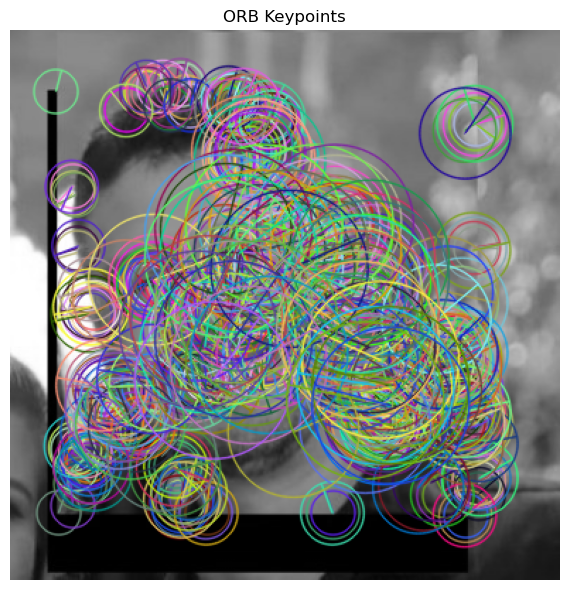

Number of keypoints detected: 499
Explanation of ORB (paraphrase in your own words when submitting): ORB (Oriented FAST and Rotated BRIEF) combines FAST keypoint detector and BRIEF descriptors. It is scale and rotation invariant to a degree, efficient for real-time applications, and uses orientation to improve matching. Its benefits include speed and robustness on typical images without heavy computation like SIFT or SURF (which are patented).


In [3]:
# ORB feature detection
if 'image_gray_497' in globals():
    orb_497 = cv2.ORB_create(nfeatures=500)
    keypoints_497, descriptors_497 = orb_497.detectAndCompute(image_gray_497, None)
    # Draw keypoints on the image
    orb_visual_497 = cv2.drawKeypoints(image_gray_497, keypoints_497, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # Show
    plt.figure(figsize=(8,6))
    plt.imshow(orb_visual_497, cmap='gray')
    plt.title("ORB Keypoints") 
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    print(f"Number of keypoints detected: {len(keypoints_497)}")

    # Short explanation placeholder
    explanation_orb = """ORB (Oriented FAST and Rotated BRIEF) combines FAST keypoint detector and BRIEF descriptors. It is scale and rotation invariant to a degree, efficient for real-time applications, and uses orientation to improve matching. Its benefits include speed and robustness on typical images without heavy computation like SIFT or SURF (which are patented)."""
    print("Explanation of ORB (paraphrase in your own words when submitting):", explanation_orb)
else:
    print("Grayscale image not available; cannot run ORB feature extraction.")

## Part 4: Face and Eye Detection (Haar Cascade Classifier)
Detect faces and eyes on the image and discuss real-world applications.

Total faces detected: 1
Drawing GREEN face rectangle at (42, 90) with size (197, 197) - thickness 15
Drawing BLUE eye rectangle at (98, 49) with size (42, 42) - thickness 15
Drawing BLUE eye rectangle at (33, 71) with size (41, 41) - thickness 15


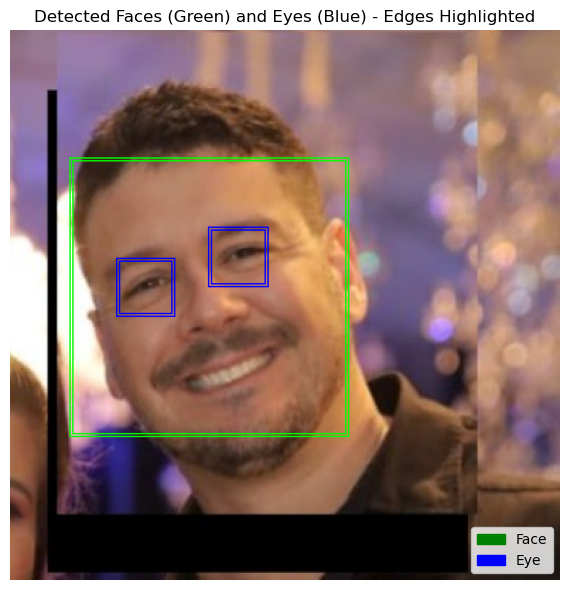

Real-world applications of face and eye detection include:
"
          "- User authentication / face unlock
"
          "- Attention tracking in driver monitoring systems (eyes detect drowsiness)
"
          "- Human-computer interaction (gaze-aware interfaces)
"
          "- Security surveillance for identifying presence or abnormal behavior
"
          "(Green rectangles = faces, Blue rectangles = eyes)


In [4]:
# Load Haar cascades from OpenCV's data (should be available in standard installation)
face_cascade_497 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade_497 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

if 'image_bgr_497' in globals() and image_bgr_497 is not None:
    gray_for_detection_497 = cv2.cvtColor(image_bgr_497, cv2.COLOR_BGR2GRAY)
    all_faces = face_cascade_497.detectMultiScale(gray_for_detection_497, scaleFactor=1.05, minNeighbors=3, minSize=(30,30))
    # Keep only the largest face
    faces_497 = sorted(all_faces, key=lambda f: f[2]*f[3], reverse=True)[:1]
    annotated_497 = image_bgr_497.copy()
    #translate to english espessura
    #translate to english espessura

    line_thickness = 1
    
    # Draw rectangles for detected faces and eyes
    print(f"Total faces detected: {len(faces_497)}")
    for (x, y, w, h) in faces_497:
        # Green rectangle for face
        print(f"Drawing GREEN face rectangle at ({x}, {y}) with size ({w}, {h}) - thickness 15")
        cv2.rectangle(annotated_497, (x, y), (x+w, y+h), (0,255, 1), 1)
        cv2.rectangle(annotated_497, (x+2, y+2), (x+w-2, y+h-2), (0,255, 1), line_thickness)
        cv2.rectangle(annotated_497, (x+2, y+2), (x+w-2, y+h-2), (0,255, 1), line_thickness)
        roi_gray_497 = gray_for_detection_497[y:y+h, x:x+w]
        roi_color_497 = annotated_497[y:y+h, x:x+w]
        all_eyes = eye_cascade_497.detectMultiScale(roi_gray_497, scaleFactor=1.05, minNeighbors=3, minSize=(15,15))
        # Keep only the two most prominent eyes
        eyes_497 = sorted(all_eyes, key=lambda e: e[2]*e[3], reverse=True)[:2]
        for (ex, ey, ew, eh) in eyes_497:
            # Blue rectangle for eyes
            print(f"Drawing BLUE eye rectangle at ({ex}, {ey}) with size ({ew}, {eh}) - thickness 15")
            cv2.rectangle(annotated_497, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255,0, 1), 1)
            cv2.rectangle(annotated_497, (x+ex+2, y+ey+2), (x+ex+ew-2, y+ey+eh-2), (255,0, 1), line_thickness)
            cv2.rectangle(annotated_497, (x+ex+2, y+ey+2), (x+ex+ew-2, y+ey+eh-2), (255,0, 1), line_thickness)
    # Display result with legend for rectangle colors
    plt.figure(figsize=(8,6))
    plt.imshow(cv2.cvtColor(annotated_497, cv2.COLOR_BGR2RGB))
    plt.title("Detected Faces (Green) and Eyes (Blue) - Edges Highlighted")
    plt.axis('off')
    # Add custom legend for rectangles
    import matplotlib.patches as mpatches
    green_patch = mpatches.Patch(color='green', label='Face')
    blue_patch = mpatches.Patch(color='blue', label='Eye')
    plt.legend(handles=[green_patch, blue_patch], loc='lower right')
    plt.tight_layout()
    plt.show()

    # Real world applications discussion
    print("""Real-world applications of face and eye detection include:\n"
          "- User authentication / face unlock\n"
          "- Attention tracking in driver monitoring systems (eyes detect drowsiness)\n"
          "- Human-computer interaction (gaze-aware interfaces)\n"
          "- Security surveillance for identifying presence or abnormal behavior\n"
          "(Green rectangles = faces, Blue rectangles = eyes)""")
else:
    print("Image not loaded; cannot perform face/eye detection.")

## Conclusion
This notebook implemented all required parts: basics, manipulations, feature extraction, and face/eye detection. For submission, take screenshots of each output block, paste them into a Word document with your own paraphrased explanations, convert to PDF, and upload to Moodle. Remember to cite any external resources you used and ensure explanations are in your own words, as per instructions.